False
False
True
True
False


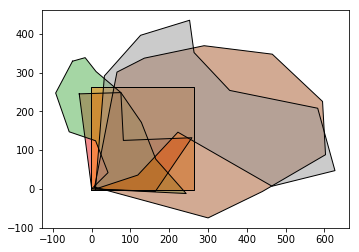

In [114]:
% matplotlib inline
import math

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString

base1 = Polygon([
    (-32.1665052195, 244.951010361),
    (0.0, 0.0),
    (164.100332863, -6.72252704724),
    (258.444740993, 131.833417876),
    (81.6832775051, 124.859373939),
    (75.3190068965, 248.195464884),
    (-32.1665052195, 244.951010361),
])

base2 = Polygon([
    (-49.4396391714, 329.180218029),
    (-92.9129195885, 247.064021685),
    (-57.9893698290, 147.064434513),
    (10.0375541578, 123.960950894),
    (42.1257258497, 41.8152313633),
    (0.0, 0.0),
    (243.639444075, -12.0928970791),
    (165.344305147, 76.4704567905),
    (128.122025984, 171.451444998),
    (75.3190068965, 248.195464884),
    (11.3210810255, 302.371185501),
    (-16.9165100634, 338.309937796),
    (-49.4396391714, 329.180218029)
])

base3 = Polygon([
    (-1.51418765128, -3.10820900539),
    (264.175873958, -3.10820900539),
    (264.175873958, 263.865379471),
    (-1.51418765128, 263.865379471),
    (-1.51418765128, -3.10820900539)
])

base4 = Polygon([
    (7.47050042245, 4.59295220067),
    (65.2292094678, 301.087658634),
    (135.823187190, 337.026410929),
    (289.846411311, 369.114582620),
    (465.689592183, 347.294625870),
    (595.325805818, 225.359573441),
    (603.026967024, 88.0221985996),
    (440.019054829, -6.95878960841),
    (300.114626252, -74.9857135952),
    (7.47050042245, 4.59295220067),
])

base5 = Polygon([
    (9.73997200653, -0.429771980603),
    (32.7216291224, 291.150002677),
    (126.084611155, 396.003813268),
    (252.483725293, 434.785359651),
    (263.974553851, 351.476852606),
    (355.901182314, 253.804809863),
    (582.845046333, 207.841495632),
    (627.372006995, 46.9698958208),
    (465.064053614, 6.75199586810),
    (222.320300328, 146.078292133),
    (118.902843307, 35.4790672629),
    (9.73997200653, -0.429771980603)
])
series = [base1, base2, base3, base4, base5]
gdf = gpd.GeoSeries(series)
gdf.plot()

for base in series:
    print(base.equals(base.convex_hull))

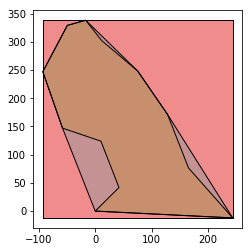

In [106]:
gpd.GeoSeries([base2.envelope, base2, base2.convex_hull]).plot()

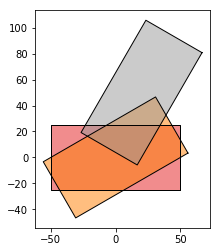

In [46]:
def get_building(length, width, rotate_angle, center=(0, 0)):
    x = center[0]
    y = center[1]
    diagonal = math.sqrt(length**2 + width**2)
    r = diagonal/2
    rotate_angle = math.radians(rotate_angle)
    original_angle = math.atan2(width, length)
    pointA_angle = -original_angle + rotate_angle
    pointB_angle = +original_angle + rotate_angle
    pointC_angle = math.pi - original_angle + rotate_angle
    pointD_angle = math.pi + original_angle + rotate_angle
    new_polygon = Polygon([(r*math.cos(pointA_angle)+x, r*math.sin(pointA_angle)+y),
                          (r*math.cos(pointB_angle)+x, r*math.sin(pointB_angle)+y),
                          (r*math.cos(pointC_angle)+x, r*math.sin(pointC_angle)+y),
                          (r*math.cos(pointD_angle)+x, r*math.sin(pointD_angle)+y)])
    return new_polygon

polygon1 = get_building(100, 50, 0, (0, 0))
polygon2 = get_building(100, 50, 30, (0, 0))
polygon3 = get_building(100, 50, 60, (20, 50))
gdf = gpd.GeoSeries([polygon1, polygon2, polygon3])
gdf.plot()

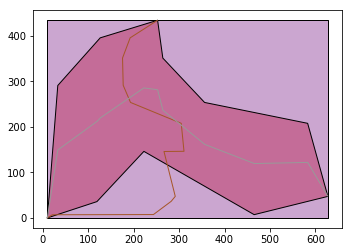

In [112]:
boundary = base5.boundary
coords = boundary.coords
print(coords)
x_list = [coord[0] for coord in coords]
y_list = [coord[1] for coord in coords]
minx = min(x_list)
maxx = max(x_list)
miny = min(y_list)
maxy = max(y_list)
base_outline = Polygon(
    [(minx, miny),
     (maxx, miny),
     (maxx, maxy),
     (minx, maxy)])
middle_line = []
middle_line_y = []
for i in range(1000):
    y = LineString([(minx, miny+i*(maxy-miny)/1000), (maxx, miny+i*(maxy-miny)/1000)])
    y2 = LineString([(minx+i*(maxx-minx)/1000, miny), (minx+i*(maxx-minx)/1000, maxy)])
    point = y.intersection(boundary).centroid
    point_y = y2.intersection(boundary).centroid
    if not point.is_empty:
        middle_line.append((point.x, point.y))
    if not point_y.is_empty:
        middle_line_y.append((point_y.x, point_y.y))
        
middle_line = LineString(middle_line)
middle_line_y = LineString(middle_line_y)
gdf = gpd.GeoSeries([base5, base_outline, middle_line, middle_line_y])
gdf.plot()

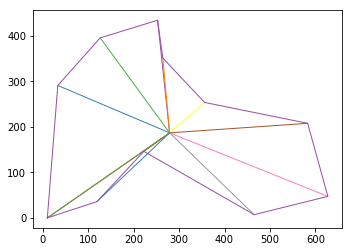

In [101]:
base = base5
centroid = base.centroid
line_list = []
for coord in base.boundary.coords:
    line = LineString([coord, centroid])
    line_list.append(line)
line_list.append(base.boundary)
gdf = gpd.GeoSeries(line_list)
gdf.plot()